### **1. Importing Libraries**

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import preprocessor as p

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import plotly

In [ ]:
# # Load the 'comments' Parquet file
# df = pd.read_parquet('comments.parquet.brotli', engine='pyarrow')
# df.head()

In [ ]:
# df.count()

In [ ]:
# df.to_csv('comments_data.csv', index=False)

# print("Comments saved to 'selected_comments.csv' successfully!")

### **2. Loading Dataset**

In [ ]:
df_comments = pd.read_csv('comments-150k.csv')
df_comments.head()

,post_id,comment_id,comment_content,comment_score,comment_created_utc
0,1501ibb,js0zukm,Did you get a second opinion?,6894.0,15-07-2023 04:18
1,1501ibb,js1079r,On purpose?,15404.0,15-07-2023 04:21
2,1501ibb,js1269h,"""Why does this keep happening to me?! Second t...",11788.0,15-07-2023 04:41
3,1501ibb,js11llk,“Is it yours?”,24645.0,15-07-2023 04:35
4,1501ibb,js0yusy,Congrats! Whose is it?,8216.0,15-07-2023 04:07


In [ ]:
#Dropping Empty and Duplicate Data

df_comments = df_comments.dropna()
df_comments = df_comments.drop_duplicates()
df_comments.count()

,0
post_id,149997
comment_id,149997
comment_content,149997
comment_score,149997
comment_created_utc,149997


### **3. Data Pre-processing**

#### **Data Cleaned to Normal Text and Empty & Duplicate Tweets are removed again**




In [ ]:
def preprocess_comment_content(row):
    comment_content = row['comment_content']
    comment_content = p.clean(comment_content)
    return comment_content

In [ ]:
df_comments['comment_content'] = df_comments.apply(preprocess_comment_content, axis=1)

In [ ]:
df_comments.head()

,post_id,comment_id,comment_content,comment_score,comment_created_utc
0,1501ibb,js0zukm,Did you get a second opinion?,6894.0,15-07-2023 04:18
1,1501ibb,js1079r,On purpose?,15404.0,15-07-2023 04:21
2,1501ibb,js1269h,"""Why does this keep happening to me?! Second t...",11788.0,15-07-2023 04:41
3,1501ibb,js11llk,Is it yours?,24645.0,15-07-2023 04:35
4,1501ibb,js0yusy,Congrats! Whose is it?,8216.0,15-07-2023 04:07


In [ ]:
df_comments = df_comments.dropna()
df_comments = df_comments.drop_duplicates()
df_comments.count()

,0
post_id,149997
comment_id,149997
comment_content,149997
comment_score,149997
comment_created_utc,149997


#### **Normal text preprocessing like**

1. Stopwords removal
2. Replace extra white spaces
3. Punctuation Removal
4. Lowercasing

In [ ]:
!pip install --upgrade gensim

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
def stopword_removal(row):
    comment_content = row['comment_content']
    comment_content = remove_stopwords(comment_content)
    return comment_content

In [ ]:
df_comments['comment_content'] = df_comments.apply(stopword_removal, axis=1)

In [ ]:
df_comments['comment_content'] = df_comments['comment_content'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

### **4. Tokenization**


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install nltk
import nltk

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
df_comments['comment_content'] = df_comments['comment_content'].apply(word_tokenize)

### **5. Stemming and Lemmatization**


In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text])
df_comments['comment_content'] = df_comments['comment_content'].apply(lambda text: stem_words(text))

### **6. Lexicon Based Sentiment Calculation**


In [ ]:
from textblob import TextBlob

In [ ]:
df_comments['polarity'] = df_comments['comment_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_comments['subjectivity'] = df_comments['comment_content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
def getAnalysis(score):
   if score < 0:
    return '-1'
   elif score == 0:
     return '0'
   else:
     return '1'
df_comments['Analysis'] = df_comments['polarity'].apply(getAnalysis)

<ipython-input-26-4ea0ee9384db>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='polarity', y='subjectivity',


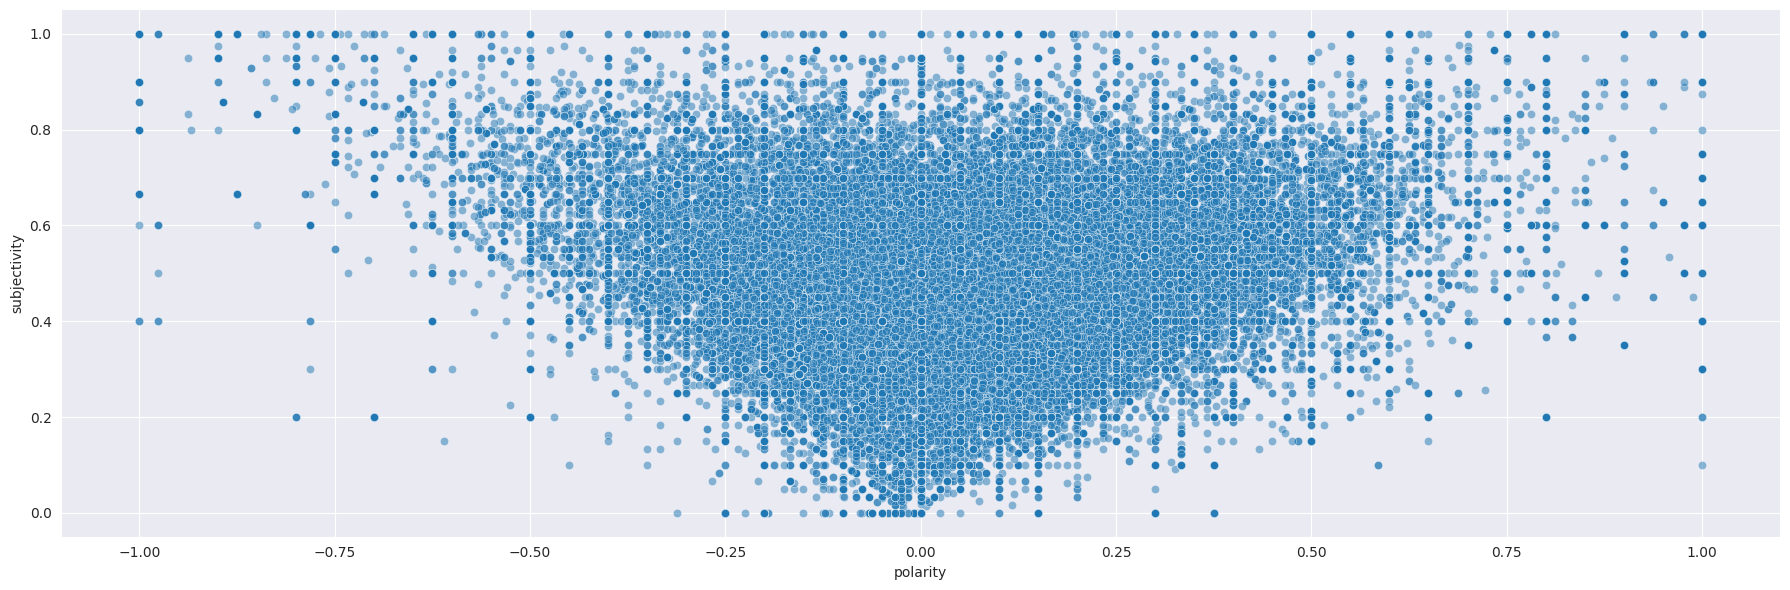

In [ ]:
sns.set_style(style= 'darkgrid')
sns.relplot(x='polarity', y='subjectivity',
            sizes=(40, 400), alpha=.5, palette="mako",
            height=6, aspect = 3,data=df_comments)

#### **Word Cloud**

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(review for review in df_comments.comment_content)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 15815539 words in the combination of all review.


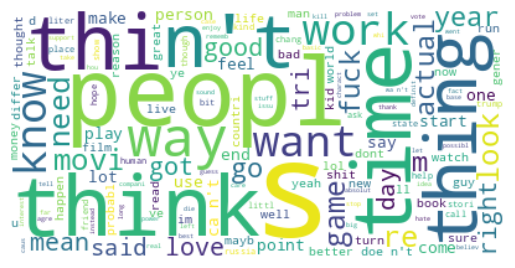

In [ ]:
wordcl = WordCloud(background_color="white").generate(text)
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_comments.head(10)

,post_id,comment_id,comment_content,comment_score,comment_created_utc,polarity,subjectivity,Analysis
0,1501ibb,js0zukm,did second opinion ?,6894.0,15-07-2023 04:18,0.000000,0.00000,0
1,1501ibb,js1079r,on purpos ?,15404.0,15-07-2023 04:21,0.000000,0.00000,0
2,1501ibb,js1269h,`` whi happen me ? ! second time week ! '',11788.0,15-07-2023 04:41,0.000000,0.00000,0
3,1501ibb,js11llk,is your ?,24645.0,15-07-2023 04:35,0.000000,0.00000,0
4,1501ibb,js0yusy,congrat ! whose it ?,8216.0,15-07-2023 04:07,0.000000,0.00000,0
5,1501ibb,js104ux,`` doe mom know yet ? '',4243.0,15-07-2023 04:20,0.000000,0.00000,0
6,1501ibb,js0zpo3,`` i 'm gon na run store real quick . brb . '',4818.0,15-07-2023 04:16,0.500000,0.75000,1
7,1501ibb,js0z4po,last year wife hand posit test strip right i w...,17197.0,15-07-2023 04:10,0.178571,0.30119,1
8,1501ibb,js0zvuv,i vasectomi met .,11258.0,15-07-2023 04:18,0.000000,0.00000,0
9,1501ibb,js1ehqy,the actual reaction best mate gf gffuck off . ...,2423.0,15-07-2023 07:05,0.500000,0.20000,1


In [ ]:
df_comments.tail(10)

,post_id,comment_id,comment_content,comment_score,comment_created_utc,polarity,subjectivity,Analysis
149989,155c710,jsvk4w4,"okay that 's fair , i 've thing . my dark seal...",1.0,21-07-2023 15:17,0.051667,0.528333,1
149990,155c710,jsuqts5,sure dont feel like achiev way though ? you 'r...,1.0,21-07-2023 11:37,0.194286,0.392063,1
149991,155c710,jsvibdy,yup ... i let poor tali die vent ... not honor...,1.0,21-07-2023 15:05,-0.400000,0.600000,-1
149992,155c710,jswhwvt,"fomo miss item , secret",1.0,21-07-2023 18:53,-0.400000,0.700000,-1
149993,155c710,jsuw9u4,i suspect they 're rare think.i 've met surpri...,9.0,21-07-2023 12:26,0.049293,0.488013,1
149994,155c710,jsvaxbs,"speak -year-old , i think i resent thi ....",3.0,21-07-2023 14:17,0.000000,0.000000,0
149995,155c710,jsu9xgy,i play elit well . awesom game commun ! i hope...,2.0,21-07-2023 08:08,-0.200000,0.700000,-1
149996,155c710,jsudkii,it make happi know peopl age enthusiast game .,2.0,21-07-2023 08:57,-0.400000,0.400000,-1
149997,155c710,jsu33jj,i tri gener . it feel disappoint me . my kid o...,1.0,21-07-2023 06:40,-0.073420,0.456467,-1
149998,155c710,jsvntyi,got there !,2.0,21-07-2023 15:40,0.000000,0.000000,0


### **7. Word Embedding (Bag of Words)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer( min_df=2,max_features=100000)
bow.fit(df_comments['comment_content'])
comments_processed = bow.transform(df_comments['comment_content']).toarray()

### **8. Splitting of Datasets**

In [ ]:
y = df_comments.drop(labels= ['polarity', 'subjectivity', 'post_id', 'comment_id', 'comment_content',	'comment_score',	'comment_created_utc'], axis=1)
X = df_comments.drop(labels= ['Analysis', 'post_id', 'comment_id', 'comment_content',	'comment_score',	'comment_created_utc'],axis=1)

In [ ]:
y

,Analysis
0,0
1,0
2,0
3,0
4,0
...,...
149994,0
149995,-1
149996,-1
149997,-1


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_test

,polarity,subjectivity
122474,-0.400000,0.600000
107305,0.227381,0.570238
87304,0.113889,0.275000
39952,0.325000,0.425000
10066,-0.100000,0.200000
...,...,...
47604,-0.450000,0.850000
54923,0.016667,0.516667
134482,0.000000,0.500000
69502,0.000000,0.100000


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 122474 to 58643
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Analysis  30000 non-null  object
dtypes: object(1)
memory usage: 468.8+ KB


### **9. Model Prediction**

#### **A. Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

#Calling the Class
NBC = BernoulliNB()

#Fitting the data to the classifier
NBC.fit(X_train , y_train.values.ravel())

BernoulliNB()

In [ ]:
#Predict on test data
y_pred = NBC.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[ 6541   112     0]
 [ 1272 11321     0]
 [    0     0 10754]]
              precision    recall  f1-score   support

          -1       0.84      0.98      0.90      6653
           0       0.99      0.90      0.94     12593
           1       1.00      1.00      1.00     10754

    accuracy                           0.95     30000
   macro avg       0.94      0.96      0.95     30000
weighted avg       0.96      0.95      0.95     30000

0.9538666666666666


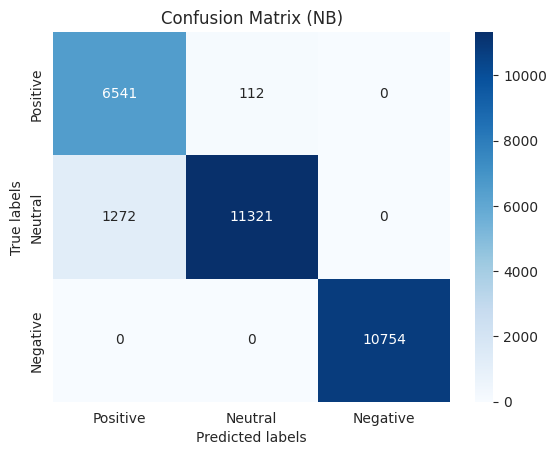

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (NB)');
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative']);

In [ ]:
classes = ['-1','0','1']

In [ ]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from yellowbrick.classifier import ClassPredictionError

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


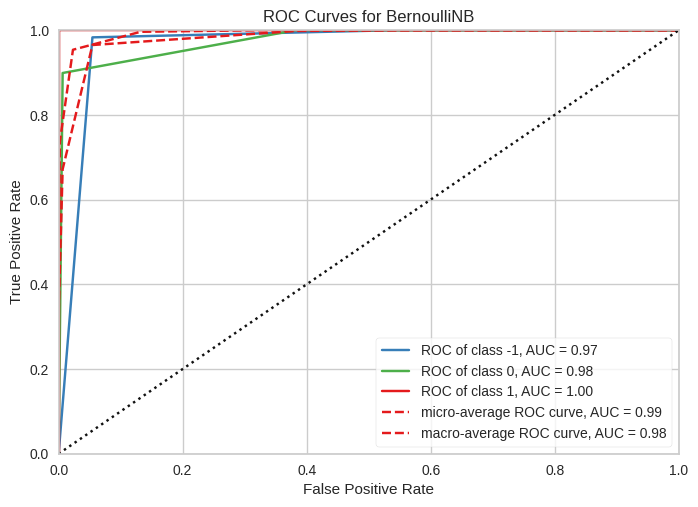

<Axes: title={'center': 'ROC Curves for BernoulliNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(NBC, classes=classes)
set_palette('bold')
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show() # Finalize and render the figure

#### **B. Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
SV = SVC(C=1.0, kernel='sigmoid', degree=7, gamma='scale', coef0=0.0, shrinking=True,  probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-
1,  decision_function_shape='ovr', break_ties=False, random_state=None)
SV.fit(X_train, y_train.values.ravel())

SVC(degree=7, kernel='sigmoid')

In [ ]:
y_pred = SV.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 4734   131  1788]
 [  594 11848   151]
 [ 1987   307  8460]]
              precision    recall  f1-score   support

          -1       0.65      0.71      0.68      6653
           0       0.96      0.94      0.95     12593
           1       0.81      0.79      0.80     10754

    accuracy                           0.83     30000
   macro avg       0.81      0.81      0.81     30000
weighted avg       0.84      0.83      0.84     30000

0.8347333333333333


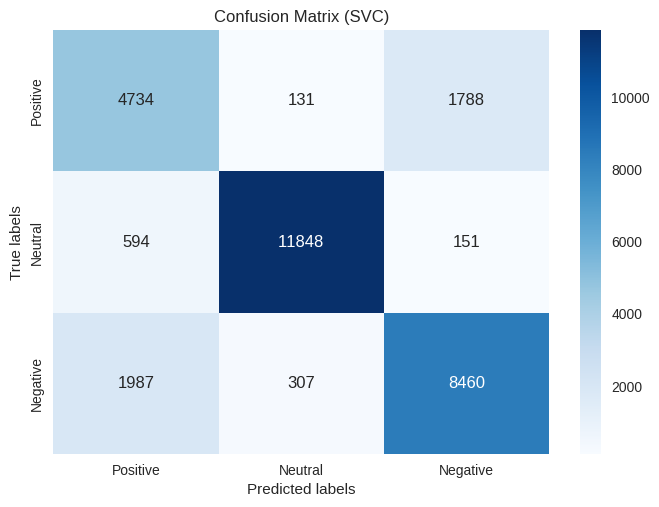

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (SVC)');
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative']);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


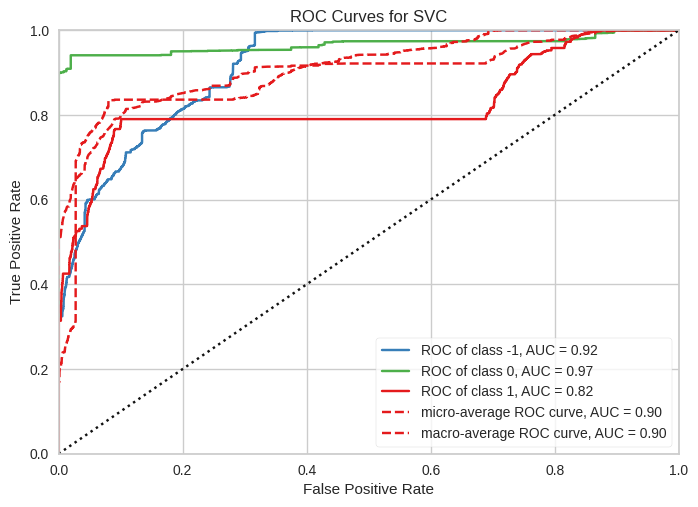

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(SV, classes=classes)
set_palette('bold')
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show() # Finalize and render the figure

#### **C. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Calling the Class
DTC = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
#Fitting the data to the classifier
DTC.fit(X_train , y_train.values.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=2, splitter='random')

In [ ]:
#Predict on test data
y_pred = DTC.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:")
print(accuracy_score(y_test,y_pred))

Confusion Matrix:
[[ 3120   441  3092]
 [    0 11987   606]
 [    0   385 10369]]
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.47      0.64      6653
           0       0.94      0.95      0.94     12593
           1       0.74      0.96      0.84     10754

    accuracy                           0.85     30000
   macro avg       0.89      0.80      0.81     30000
weighted avg       0.88      0.85      0.84     30000

Accuracy:
0.8492


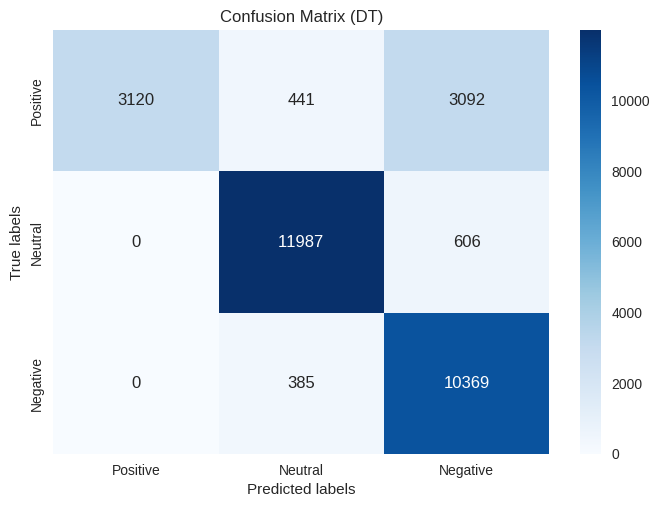

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (DT)');
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative']);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


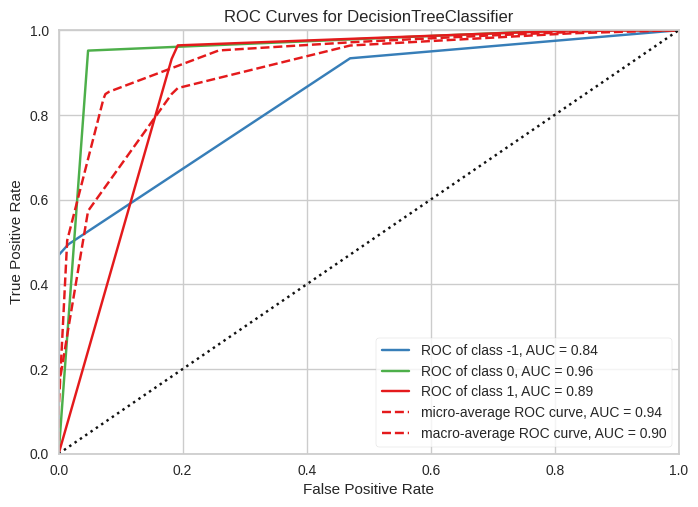

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(DTC, classes=classes)
set_palette('bold')
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show() # Finalize and render the figure

#### **D. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver="liblinear")
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:")
print(accuracy_score(y_test,y_pred))

Confusion Matrix:
[[ 6361   279    13]
 [    0 12170   423]
 [    0   178 10576]]
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.96      0.98      6653
           0       0.96      0.97      0.97     12593
           1       0.96      0.98      0.97     10754

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000

Accuracy:
0.9702333333333333


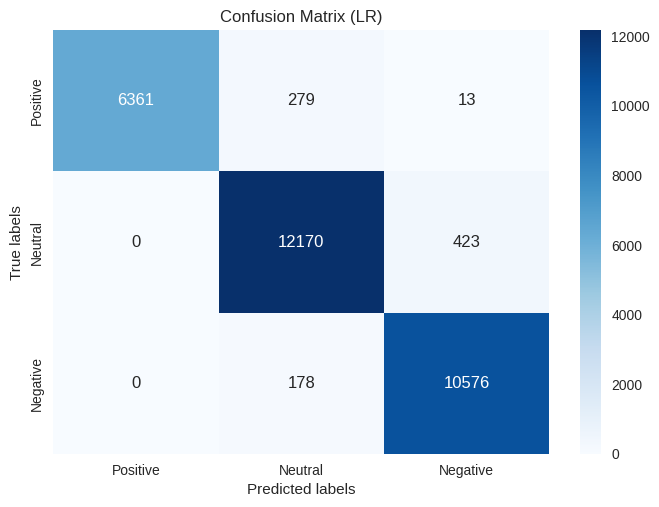

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (LR)');
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative']);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


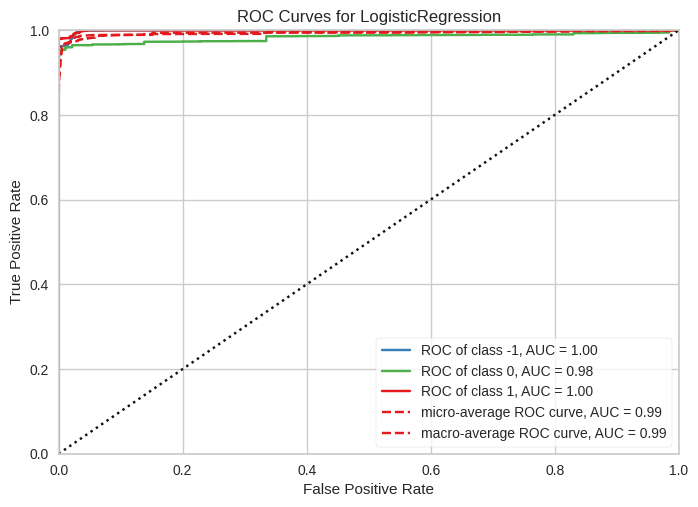

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(LR, classes=classes)
set_palette('bold')
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show() # Finalize and render the figure

#### **E. K-Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = KNN.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:")
print(accuracy_score(y_test,y_pred))

Confusion Matrix:
[[ 6639    12     2]
 [    9 12581     3]
 [    5    17 10732]]
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      6653
           0       1.00      1.00      1.00     12593
           1       1.00      1.00      1.00     10754

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Accuracy:
0.9984


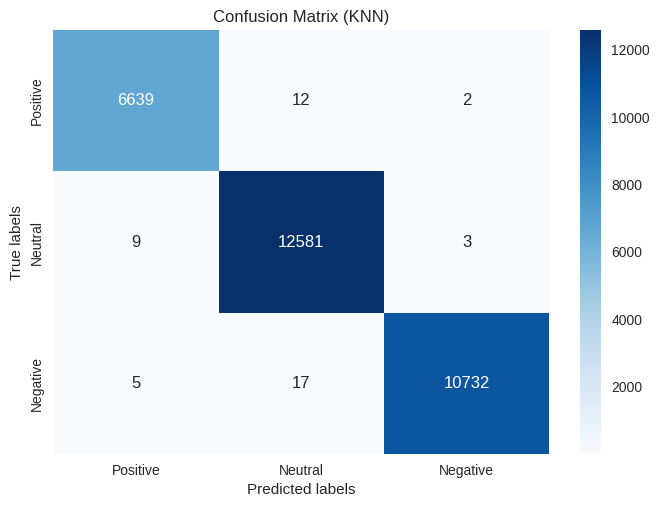

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (KNN)');
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative']);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


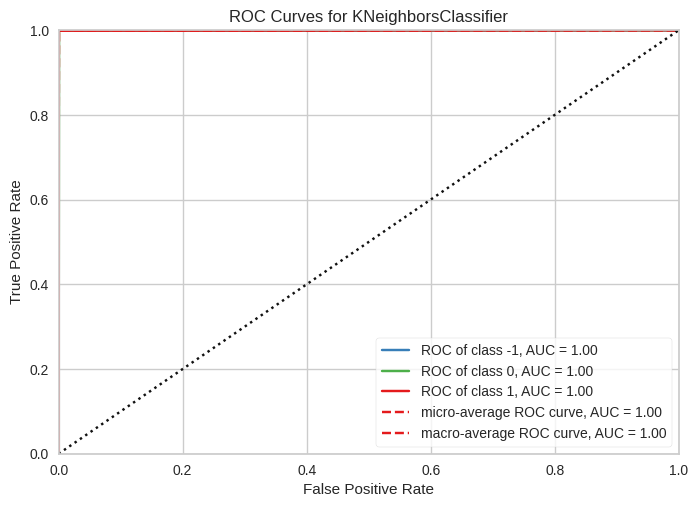

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(KNN, classes=classes)
set_palette('bold')
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show() # Finalize and render the figure

#### **F. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:")
print(accuracy_score(y_test,y_pred))

Confusion Matrix:
[[ 6644     5     4]
 [    0 12586     7]
 [    2    17 10735]]
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      6653
           0       1.00      1.00      1.00     12593
           1       1.00      1.00      1.00     10754

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Accuracy:
0.9988333333333334


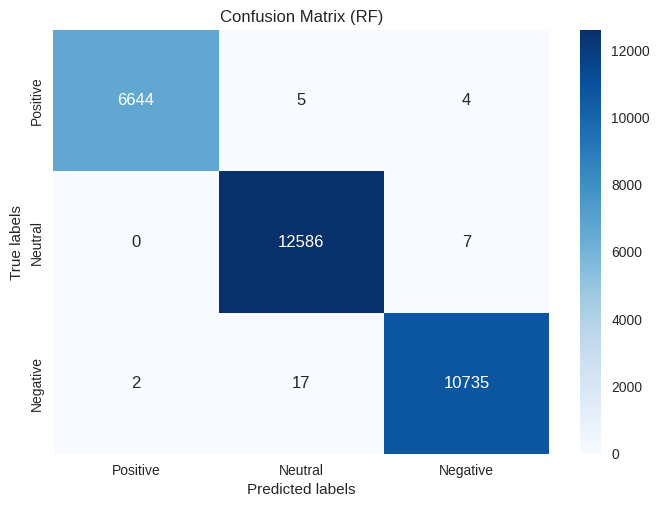

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (RF)');
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative']);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


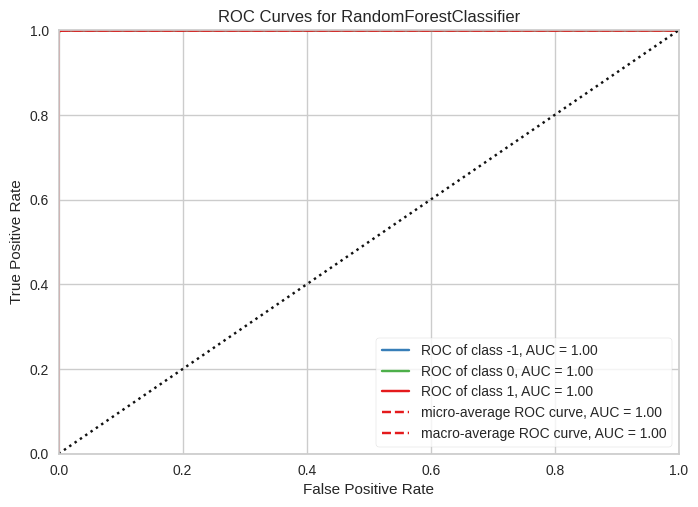

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(RF, classes=classes)
set_palette('bold')
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show() # Finalize and render the figure